In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, ensemble
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv("pbp.csv")

pass_data = data[data['pass_attempt'] == 1]
pass_data = pass_data[['old_game_id', 'pass_attempt', 'yrdln', "receiver", 'ydstogo', 'defteam', 'posteam', 'yards_gained', 'touchdown', 'passer', 'complete_pass', 'pass_length', 'pass_location', 'score_differential', 'posteam_score']]
#pass_data = pass_data.rename(columns={'complete_pass':'complete_pass'})
pass_data['posteam'].fillna(value = 'NA', inplace = True)

In [195]:
pass_data.loc[pass_data['complete_pass'] == 1,'complete_pass'] = 2
pass_data.loc[pass_data['complete_pass'] == 0,'complete_pass'] = 1.0 
pass_data.loc[pass_data['complete_pass'] == 2,'complete_pass'] = 0.0

In [39]:
pass_data

,old_game_id,pass_attempt,yrdln,receiver,ydstogo,defteam,posteam,yards_gained,touchdown,passer,complete_pass,pass_length,pass_location,score_differential,posteam_score
3,2022091107,1.0,NYJ 41,Mi.Carter,10.0,BAL,NYJ,0.0,0.0,J.Flacco,1.0,short,left,0.0,0.0
5,2022091107,1.0,NYJ 46,NaN,5.0,BAL,NYJ,0.0,0.0,J.Flacco,1.0,short,right,0.0,0.0
7,2022091107,1.0,BAL 28,R.Bateman,10.0,NYJ,BAL,4.0,0.0,L.Jackson,0.0,short,right,0.0,0.0
8,2022091107,1.0,BAL 32,D.Duvernay,6.0,NYJ,BAL,4.0,0.0,L.Jackson,0.0,short,left,0.0,0.0
11,2022091107,1.0,BAL 40,D.Duvernay,10.0,NYJ,BAL,8.0,0.0,L.Jackson,0.0,short,left,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11544,2022100600,1.0,DEN 49,P.Campbell,1.0,DEN,IND,12.0,0.0,M.Ryan,0.0,short,right,0.0,9.0
11545,2022100600,1.0,DEN 37,M.Pittman,10.0,DEN,IND,4.0,0.0,M.Ryan,0.0,short,left,0.0,9.0
11550,2022100600,1.0,DEN 25,M.Gordon,10.0,IND,DEN,24.0,0.0,R.Wilson,0.0,short,middle,-3.0,9.0
11551,2022100600,1.0,DEN 49,J.Jeudy,10.0,IND,DEN,37.0,0.0,R.Wilson,0.0,deep,right,-3.0,9.0


Text(0.5, 0.98, 'Defense Against Short and Deep Passes')

<Figure size 864x864 with 0 Axes>

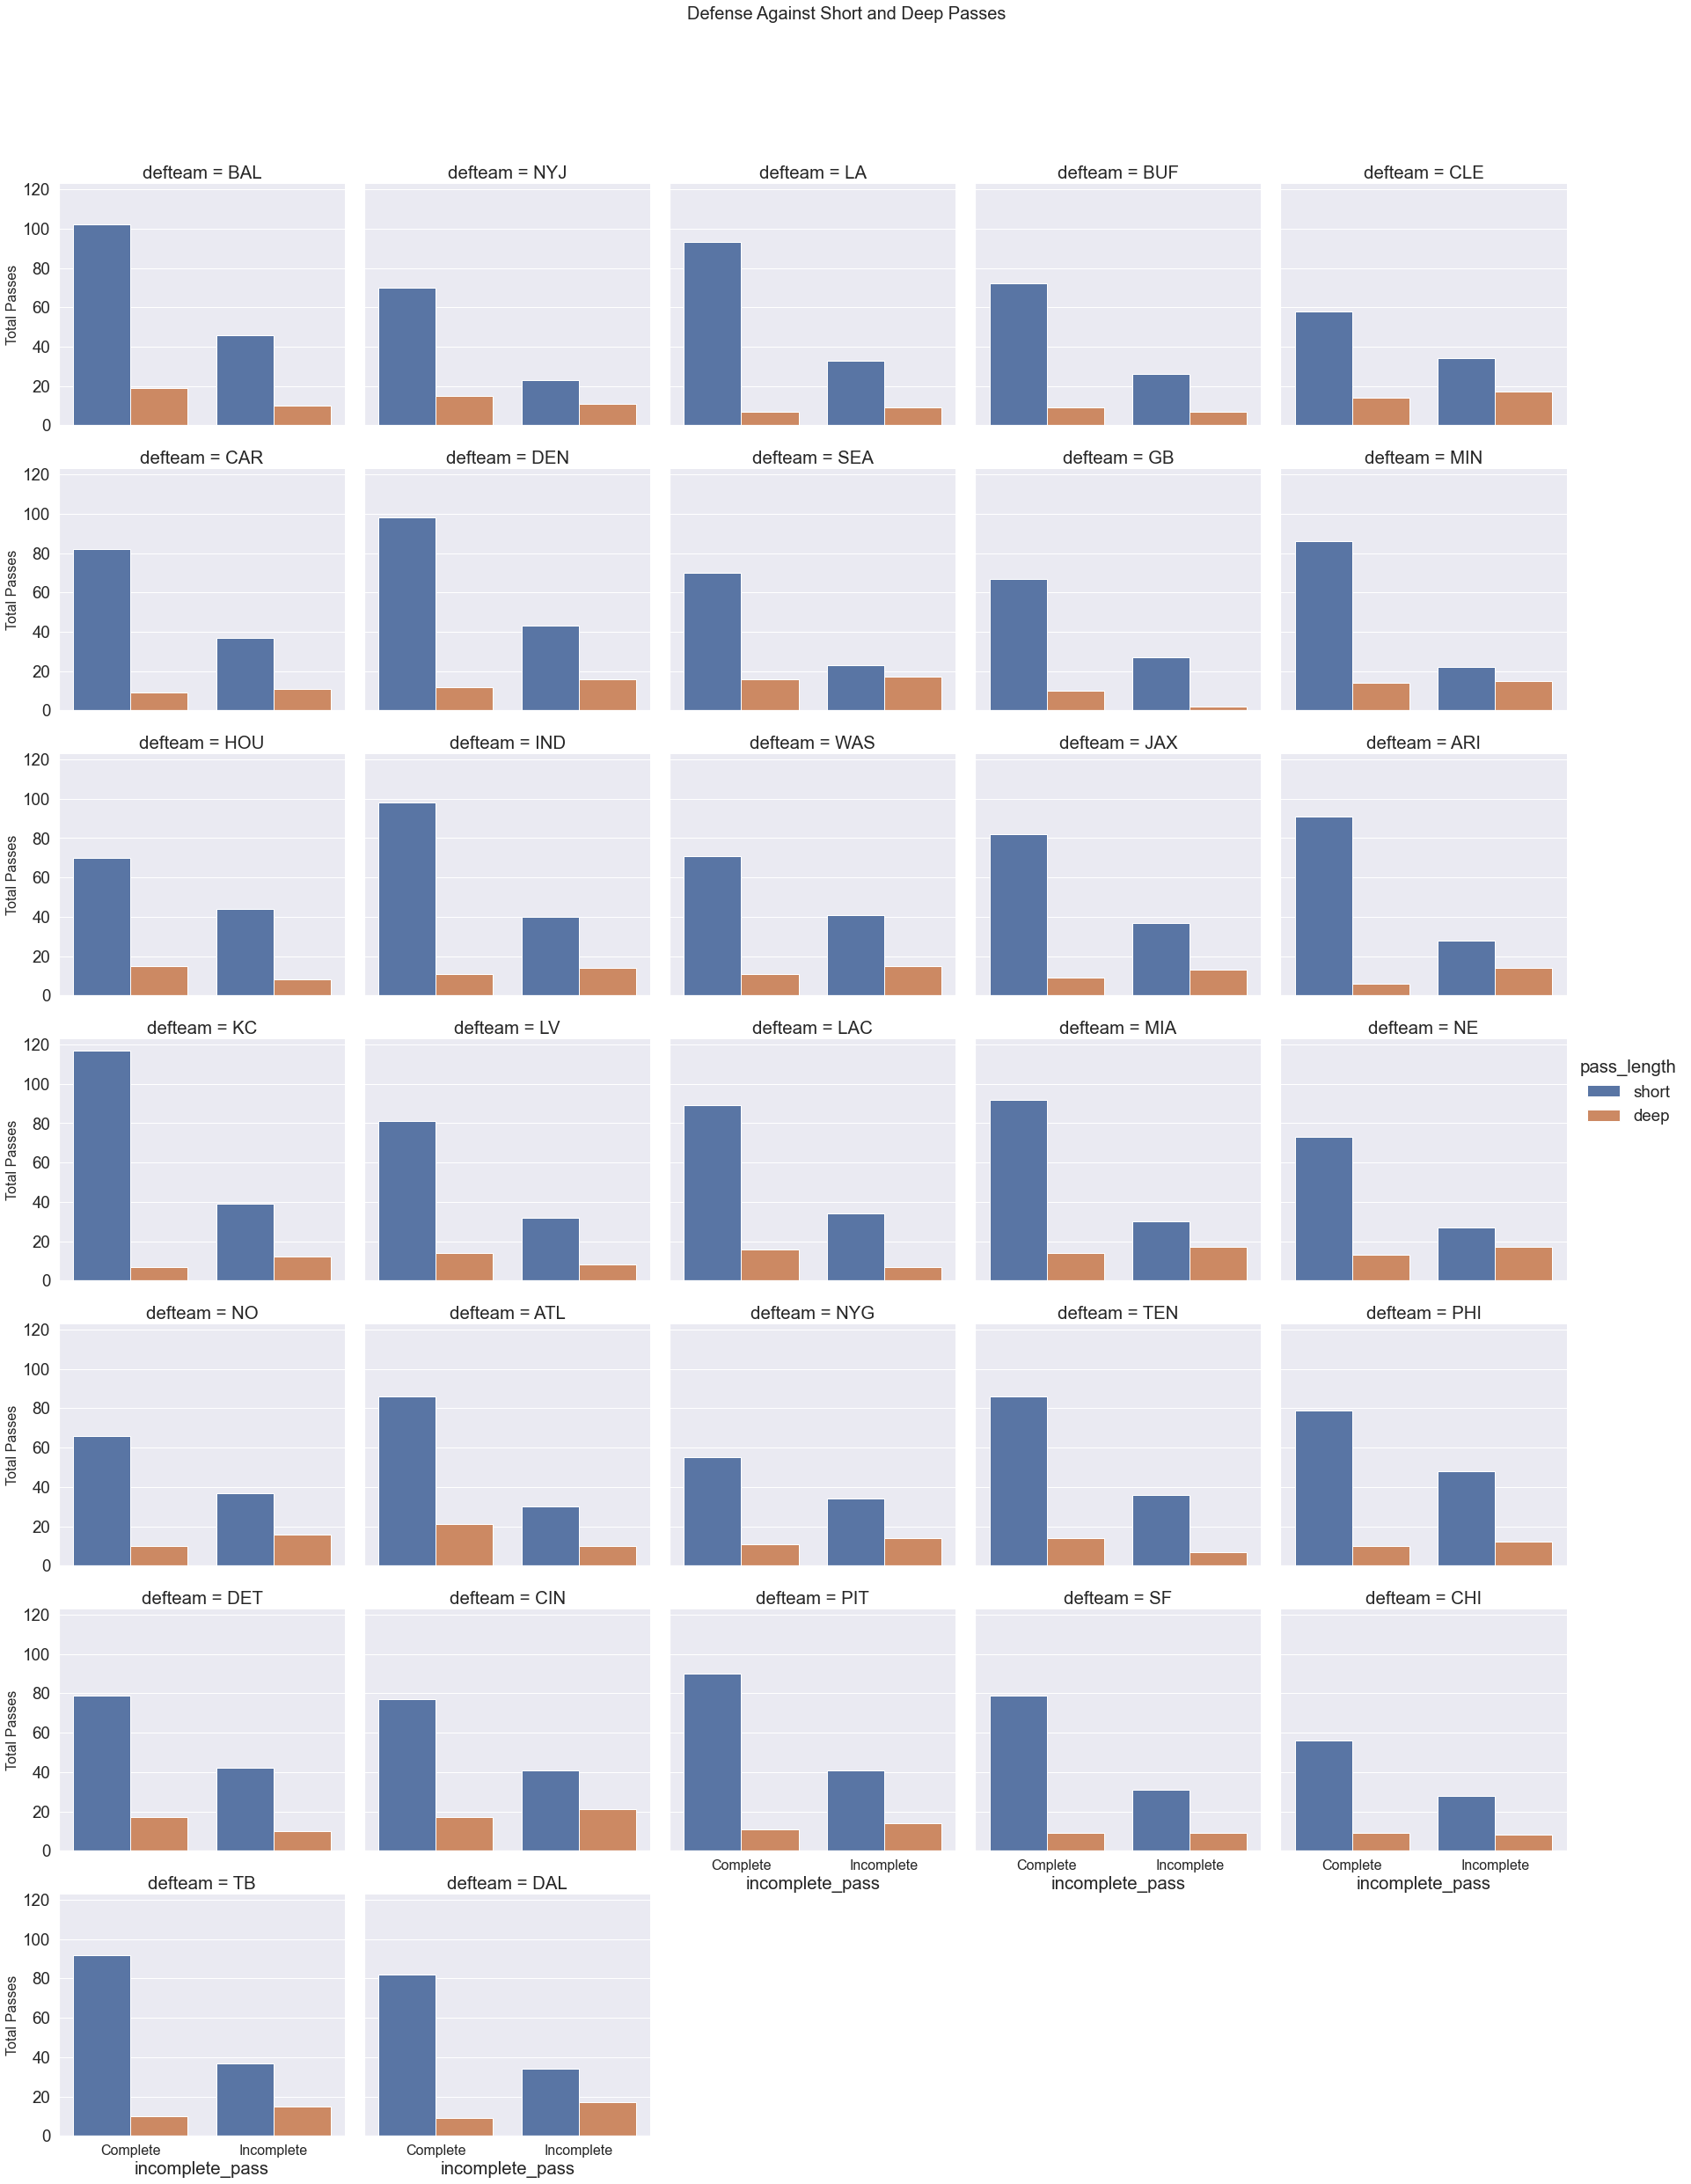

In [4]:
plt.figure(figsize= (12, 12))
sns.set(font_scale = 1.7)
ax = sns.factorplot("complete_pass",hue = 'pass_length', col = 'defteam',kind = 'count',  data = pass_data, col_wrap = 5)
ax.set_ylabels('Total Passes', fontsize = 16)
ax.set_xticklabels({ 'Complete' : 1,  'Incomplete' :0}, fontsize = 16)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Defense Against Short and Deep Passes', fontsize =20)

TypeError: Got both 'fontsize' and 'size', which are aliases of one another

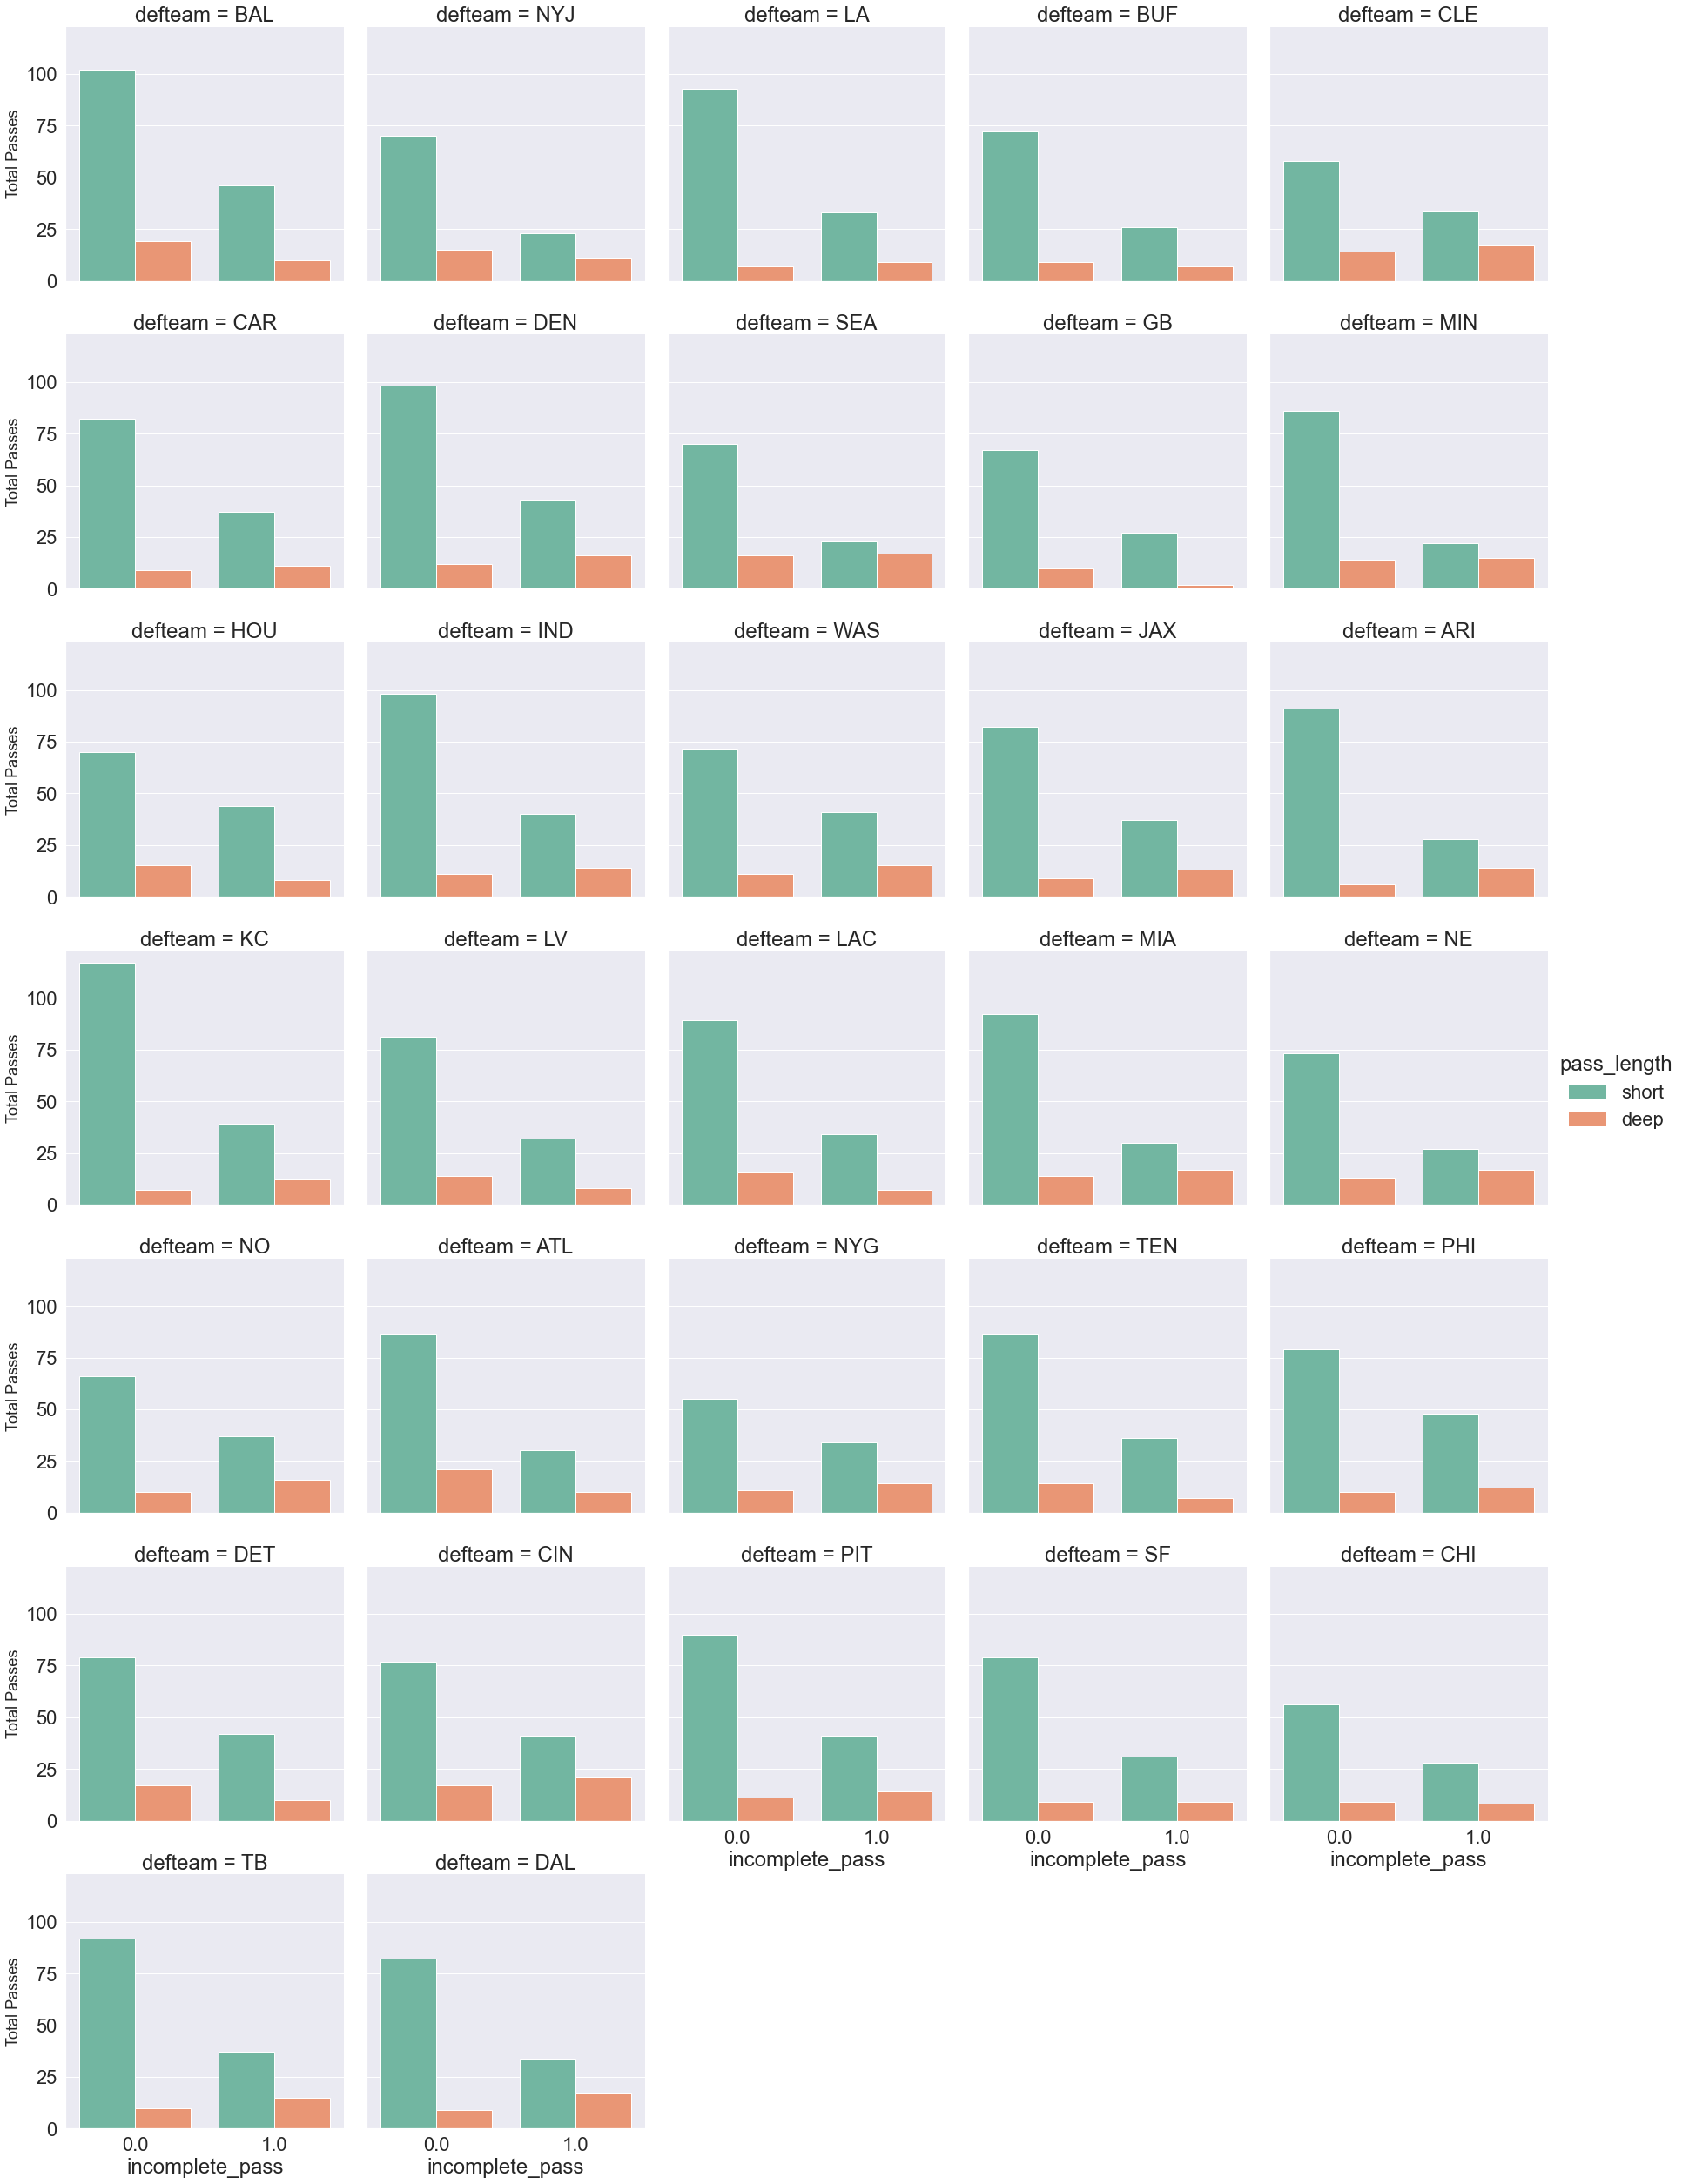

In [5]:
sns.set(font_scale = 2)
ax =sns.factorplot("complete_pass",hue = 'pass_length', col = 'defteam', kind = 'count', palette = "Set2", data = pass_data, col_wrap = 5)
ax.set_ylabels('Total Passes', fontsize = 18)

ax.set_titles( fontsize = 18)
plt.subplots_adjust(top = 0.9)
ax.fig.suptitle('Defense Against Left, Middle, and Right Passes', fontsize = 30)
ax.set_xticklabels({'Complete': 1, 'Incomplete': 0}, fontsize = 18)

In [28]:
teamss = np.unique(pass_data['defteam'].values)  
pass_data.loc[pass_data['complete_pass'] == 1,'complete_pass'] = 1.0
pass_data.loc[pass_data['complete_pass'] == 0,'complete_pass'] = 0.0
pass_data['complete_pass'].fillna(value = 999, inplace = True)
pass_data = pass_data[pass_data['complete_pass'] != 999]
pass_data['Receptions'] = pass_data["complete_pass"].astype('int64')

# Let's create a dataset with every row representing a receiver's performance in a single game. 
reception_info = pass_data.loc[pass_data['complete_pass'] != 999, ['passer', 'receiver','pass_attempt', 'old_game_id', "yards_gained", 'Receptions', 'defteam', 'posteam']].groupby(by = ["posteam", "defteam", 'old_game_id', 'receiver', 'passer'], as_index = False).sum()
reception_info.sort_values(by = ["receiver", "old_game_id"], inplace = True)
reception_info.reset_index(drop = True, inplace = True)

packers = reception_info.loc[reception_info.posteam == 'GB']
packers['Targets'] = packers.pop('pass_attempt')


# ax =sns.factorplot('Receptions',hue = 'pass_location', data = pass_data[(pass_data.posteam == "GB") & (pass_data.receiver.isin(packers.loc[packers.Receptions > 4].receiver.values))], col = 'defteam', kind = 'count', col_wrap = 5)
# ax.set_ylabels('TotalPasses', fontsize = 18)
# plt.subplots_adjust(top =0.9)
# ax.fig.suptitle('Packers Receptions in Different Pass Directions', fontsize = 30)
# ax.set_xticklabels({'Complete' : 1, 'Incomplete' : 0}, fontsize = 18)
# plt.show()
# ax = sns.factorplot('Receptions',hue = 'pass_location', data = pass_data[(pass_data.posteam == "GB") & (pass_data.receiver.isin(packers.loc[packers.Receptions > 4].receiver.values))], col = 'receiver', kind = 'count', col_wrap = 5, palette = 'Set3')
# ax.set_ylabels('TotalPasses', fontsize = 18)
# ax.set_xticklabels({'Complete':1, 'Incomplete': 0}, fontsize =18)
# plt.subplots_adjust(top = 0.9)
# ax.fig.suptitle('Packers receivers Receptions in Different Pass Directions', fontsize = 30)

In [16]:
pass_data

,old_game_id,pass_attempt,yrdln,receiver,ydstogo,defteam,posteam,yards_gained,touchdown,passer,complete_pass,pass_length,pass_location,score_differential,posteam_score,Receptions
3,2022091107,1.0,NYJ 41,Mi.Carter,10.0,BAL,NYJ,0.0,0.0,J.Flacco,0.0,short,left,0.0,0.0,0
5,2022091107,1.0,NYJ 46,NaN,5.0,BAL,NYJ,0.0,0.0,J.Flacco,0.0,short,right,0.0,0.0,0
7,2022091107,1.0,BAL 28,R.Bateman,10.0,NYJ,BAL,4.0,0.0,L.Jackson,1.0,short,right,0.0,0.0,1
8,2022091107,1.0,BAL 32,D.Duvernay,6.0,NYJ,BAL,4.0,0.0,L.Jackson,1.0,short,left,0.0,0.0,1
11,2022091107,1.0,BAL 40,D.Duvernay,10.0,NYJ,BAL,8.0,0.0,L.Jackson,1.0,short,left,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11544,2022100600,1.0,DEN 49,P.Campbell,1.0,DEN,IND,12.0,0.0,M.Ryan,1.0,short,right,0.0,9.0,1
11545,2022100600,1.0,DEN 37,M.Pittman,10.0,DEN,IND,4.0,0.0,M.Ryan,1.0,short,left,0.0,9.0,1
11550,2022100600,1.0,DEN 25,M.Gordon,10.0,IND,DEN,24.0,0.0,R.Wilson,1.0,short,middle,-3.0,9.0,1
11551,2022100600,1.0,DEN 49,J.Jeudy,10.0,IND,DEN,37.0,0.0,R.Wilson,1.0,deep,right,-3.0,9.0,1


In [7]:
pass_data["complete_pass"].astype('int64')

3        0
5        0
7        0
8        0
11       0
        ..
11544    0
11545    0
11550    0
11551    0
11557    0
Name: incomplete_pass, Length: 4826, dtype: int64

In [29]:
reception_info['last_four_rec'] = range(len(reception_info))
reception_info['last_four_yds'] = range(len(reception_info))
reception_info['last_two_rec'] = range(len(reception_info))
reception_info['last_two_yds'] = range(len(reception_info))

teams_info = pass_data[['yards_gained', "Receptions", "defteam", "old_game_id", "pass_attempt"]].groupby(by = ["old_game_id", "defteam"], as_index = False).sum()
teams_info = teams_info.sort_values(by = ["defteam","old_game_id"])
teams_info = teams_info[teams_info['yards_gained'] > 100]
teams_info.reset_index(drop= True, inplace = True)
teams_info['previous_yds'] = range(len(teams_info))
teams_info['previous2_yds'] = range(len(teams_info))
teams_info['previous_rec'] = range(len(teams_info))
teams_info['previous2_rec'] = range(len(teams_info))
teams_info['previous_plays'] = range(len(teams_info))
teams_info['previous4_plays'] = range(len(teams_info))

In [ ]:
pass_data[['yards_gained', "Receptions", "defteam", "old_game_id", "pass_attempt"]].groupby(by = ["old_game_id", "defteam"], as_index = False).sum()

In [8]:
reception_info['last_two_rec'] 

0          0
1          1
2          2
3          3
4          4
        ... 
4285    4285
4286    4286
4287    4287
4288    4288
4289    4289
Name: last_two_rec, Length: 4290, dtype: int32

In [30]:
def recs(x):
    ind = list(reception_info['last_four_rec'].values).index(x)
    not_done = True
    i = 4
    while not_done:
        if ind > 4:
            if reception_info.loc[ind, 'receiver'] == reception_info.loc[ind-i, 'receiver'] :
               
                  return reception_info['Receptions'].loc[ind - i: ind -1 ].mean()
            elif i == 1:
                  return reception_info['Receptions'].median()
            i = i -1 
        else:
            return reception_info['Receptions'].loc[ind - i: ind -1].sum()

In [36]:
reception_info['Receptions'].loc[5 - 4: 5 -1 ]

1    1
2    2
3    2
4    2
Name: Receptions, dtype: int64

In [15]:
def recs(x):
    ind = list(reception_info['last_four_rec'].values).index(x)
    not_done = True
    i = 4
    while not_done:
        if ind > 4:
            if reception_info.loc[ind, 'receiver'] == reception_info.loc[ind-i, 'receiver'] :
               
                  return reception_info['Receptions'].loc[ind - i: ind -1 ].mean()
            elif i == 1:
                  return reception_info['Receptions'].median()
            i = i -1 
        else:
            return reception_info['Receptions'].loc[ind - i: ind -1].sum()

,old_game_id,defteam,yards_gained,Receptions,pass_attempt,previous_yds,previous2_yds,previous_rec,previous2_rec,previous_plays,previous4_plays
0,2022091110,ARI,360.0,30,39.0,0,0,0,0,0,0
1,2022091811,ARI,244.0,25,40.0,1,1,1,1,1,1
2,2022092510,ARI,239.0,18,26.0,2,2,2,2,2,2
3,2022100210,ARI,180.0,22,39.0,3,3,3,3,3,3
4,2022091100,ATL,236.0,23,39.0,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...
122,2022100206,TEN,327.0,27,40.0,122,122,122,122,122,122
123,2022091108,WAS,260.0,24,45.0,123,123,123,123,123,123
124,2022091802,WAS,234.0,20,37.0,124,124,124,124,124,124
125,2022092508,WAS,328.0,22,38.0,125,125,125,125,125,125


In [22]:
def recs(x):
    ind = list(reception_info['last_four_rec'].values).index(x)
    not_done = True
    i = 4
    while not_done:
        if ind > 4:
            if reception_info.loc[ind, 'receiver'] == reception_info.loc[ind-i, 'receiver'] :
               
                  return reception_info['Receptions'].loc[ind - i: ind -1 ].mean()
            elif i == 1:
                  return reception_info['Receptions'].median()
            i = i -1 
        else:
            return reception_info['Receptions'].loc[ind - i: ind -1].sum()
def yds(x):
    ind = list(reception_info['last_four_yds'].values).index(x)
    not_done = True
    i = 4
    while not_done:
        if ind > 4:
            if reception_info.loc[ind, 'receiver'] == reception_info.loc[ind-i, 'receiver'] :
               
                  return reception_info['yards_gained'].loc[ind - i: ind -1].mean()
            elif i == 1:
                  return reception_info['yards_gained'].median()
            i = i -1 
        else:
            return reception_info['yards_gained'].loc[ind - i: ind -1].sum()
def yds2(x):
    ind = list(reception_info['last_two_yds'].values).index(x)
    not_done = True
    i = 2
    while not_done:
        if ind > 2:
            if reception_info.loc[ind, 'receiver'] == reception_info.loc[ind-i, 'receiver'] :
               
                  return reception_info['yards_gained'].loc[ind - i: ind -1].mean()
            elif i == 1:
                  return reception_info['yards_gained'].median()
            i = i -1 
        else:
            return reception_info['yards_gained'].loc[ind - i: ind -1].sum()
def recs2(x):
    ind = list(reception_info['last_two_rec'].values).index(x)
    not_done = True
    i = 2
    while not_done:
        if ind > 1:
            if reception_info.loc[ind, 'receiver'] == reception_info.loc[ind-i, 'receiver'] :
               
                  return reception_info['Receptions'].loc[ind - i: ind -1].mean()
            elif i == 1:
                  return reception_info['Receptions'].median()
            i = i -1 
        else:
            return reception_info['Receptions'].loc[: ind -1].mean()
def teams(x):
    ind = list(teams_info['previous_yds'].values).index(x)
    team = teams_info.loc[ind, 'defteam']
    ind2 = list(teams_info['defteam'].values).index(team)
    if ind == 0 :
        return teams_info['yards_gained'].median()
    elif ind > ind2:
        
        return teams_info.loc[ind2: ind-1, 'yards_gained'].mean()
    else:
        return teams_info['yards_gained'].median()
def teams2(x):
    ind = list(teams_info['previous2_yds'].values).index(x)
    not_done = True
    i = 2
    while not_done:
        if ind > 2:
            if teams_info.loc[ind, 'defteam'] == teams_info.loc[ind-i, 'defteam'] :
               
                  return teams_info['yards_gained'].loc[ind - i: ind -1].mean()
            elif i == 1:
                  return teams_info['yards_gained'].median()
            i = i -1 
        else:
            return teams_info['yards_gained'].loc[ind - i: ind -1].mean()
def teamsr(x):
    ind = list(teams_info['previous_rec'].values).index(x)
    team = teams_info.loc[ind, 'defteam']
    ind2 = list(teams_info['defteam'].values).index(team)
    if ind == 0 :
        return teams_info['Receptions'].median()
    elif ind > ind2:
          return teams_info.loc[ind2: ind-1, 'Receptions'].mean()
    else:
        return teams_info['Receptions'].median()
def teamsr2(x):
    ind = list(teams_info['previous2_rec'].values).index(x)
    not_done = True
    i = 2
    while not_done:
        if ind > 2:
            if teams_info.loc[ind, 'defteam'] == teams_info.loc[ind-i, 'defteam'] :
               
               return teams_info.loc[ind -i: ind-1, 'Receptions'].mean()     
            elif i == 1:
                  return reception_info['Receptions'].median()
            i = i -1 
        else:
            return teams_info['Receptions'].loc[ind - i: ind -1].mean()
def teamsp(x):
    ind = list(teams_info['previous_plays'].values).index(x)
    team = teams_info.loc[ind, 'defteam']
    ind2 = list(teams_info['defteam'].values).index(team)
    if ind == 0 :
        return teams_info['pass_attempt'].median()
    elif ind > ind2:
        
        return teams_info.loc[ind2: ind-1, 'pass_attempt'].mean()
    else:
        return teams_info['pass_attempt'].median()
def teamsp2(x):
    ind = list(teams_info['previous4_plays'].values).index(x)
    not_done = True
    i = 4
    while not_done:
        if ind > 4:
            if teams_info.loc[ind, 'defteam'] == teams_info.loc[ind-i, 'defteam'] :
               
                  return teams_info.loc[ind - i: ind -1, 'pass_attempt'].mean()
            elif i == 1:
                  return teams_info['pass_attempt'].median()
            i = i -1
        else:
            return teams_info['pass_attempt'].loc[ind - i: ind -1].mean()
reception_info['last_four_rec'] = reception_info['last_four_rec'].apply(lambda x: recs(x))  
reception_info['last_four_yds'] = reception_info['last_four_yds'].apply(lambda x: yds(x))  
reception_info['last_two_rec'] = reception_info['last_two_rec'].apply(lambda x: recs2(x))  
reception_info['last_two_yds'] = reception_info['last_two_yds'].apply(lambda x: yds2(x)) 



teams_info['previous_yds'] = teams_info['previous_yds'].apply(lambda x: teams(x))
teams_info['previous2_yds'] = teams_info['previous2_yds'].apply(lambda x: teams2(x))
teams_info['previous_rec'] = teams_info['previous_rec'].apply(lambda x: teamsr(x))
teams_info['previous2_rec'] = teams_info['previous2_rec'].apply(lambda x: teamsr2(x))
teams_info['previous_plays'] = teams_info['previous_plays'].apply(lambda x: teamsp(x))
teams_info['previous4_plays'] = teams_info['previous4_plays'].apply(lambda x: teamsp2(x))


teams_info = teams_info.drop(['Receptions', 'yards_gained', 'pass_attempt'], axis = 1)
reception_info  = reception_info.merge(teams_info, on = ['defteam', "old_game_id"])


print(reception_info.corr()["Receptions"] )
reception_info = reception_info.dropna()

old_game_id       -0.044234
pass_attempt       0.908001
yards_gained       0.839018
Receptions         1.000000
last_four_rec      0.351074
last_four_yds      0.320955
last_two_rec       0.338538
last_two_yds       0.300013
previous_yds      -0.017630
previous2_yds     -0.015289
previous_rec      -0.015774
previous2_rec      0.000412
previous_plays    -0.022447
previous4_plays   -0.022448
Name: Receptions, dtype: float64


In [26]:
reception_info

,posteam,defteam,old_game_id,receiver,passer,pass_attempt,yards_gained,Receptions,last_four_rec,last_four_yds,last_two_rec,last_two_yds,previous_yds,previous2_yds,previous_rec,previous2_rec,previous_plays,previous4_plays
1,LV,LAC,2022091111,B.Bolden,D.Carr,2.0,21.0,2,2.000000,19.000000,2.0,19.0,226.000000,226.0,22.000000,2.0,37.000000,37.000000
2,LV,LAC,2022091111,D.Adams,D.Carr,17.0,141.0,10,2.000000,19.000000,2.0,19.0,226.000000,226.0,22.000000,2.0,37.000000,37.000000
3,LV,LAC,2022091111,D.Waller,D.Carr,6.0,79.0,4,2.000000,19.000000,2.0,19.0,226.000000,226.0,22.000000,2.0,37.000000,37.000000
4,LV,LAC,2022091111,H.Renfrow,D.Carr,7.0,21.0,3,2.000000,19.000000,2.0,19.0,226.000000,226.0,22.000000,2.0,37.000000,37.000000
5,LV,LAC,2022091111,J.Jacobs,D.Carr,1.0,16.0,1,2.000000,19.000000,2.0,19.0,226.000000,226.0,22.000000,2.0,37.000000,37.000000
6,LV,LAC,2022091111,J.Johnson,D.Carr,1.0,1.0,1,2.000000,43.000000,2.0,43.0,226.000000,226.0,22.000000,2.0,37.000000,37.000000
7,LV,LAC,2022091111,M.Hollins,D.Carr,1.0,16.0,1,2.000000,19.000000,2.0,19.0,226.000000,226.0,22.000000,2.0,37.000000,37.000000
8,LV,ARI,2022091811,A.Abdullah,D.Carr,1.0,23.0,1,0.000000,0.000000,0.0,0.0,360.000000,360.0,30.000000,30.0,39.000000,39.000000
9,LV,ARI,2022091811,D.Adams,D.Carr,7.0,12.0,2,10.000000,141.000000,10.0,141.0,360.000000,360.0,30.000000,30.0,39.000000,39.000000
10,LV,ARI,2022091811,D.Waller,D.Carr,8.0,50.0,6,4.000000,79.000000,4.0,79.0,360.000000,360.0,30.000000,30.0,39.000000,39.000000


In [131]:
reception_info['defteam']=reception_info['defteam'].replace(['KC', 'JAX', 'CAR', 'BAL', 'BUF', 'MIN', 'DET', 'ATL', 'NE', 'WAS',
           'CIN', 'NO', 'SF', 'LA', 'NYG', 'DEN', 'CLE', 'IND', 'TEN', 'NYJ',
           'TB', 'MIA', 'PIT', 'PHI', 'GB', 'CHI', 'DAL', 'ARI', 'LAC', 'HOU',
           'SEA', 'LV'],
            ['kan','jax','car', 'rav', 'buf', 'min', 'det', 'atl', 'nwe', 'was', 
            'cin', 'nor', 'sfo', 'ram', 'nyg', 'den', 'cle', 'clt', 'oti', 'nyj', 
             'tam','mia', 'pit', 'phi', 'gnb', 'chi', 'dal', 'crd', 'sdg', 'htx', 'sea', 'rai' ])

In [118]:
reception_info['posteam']=reception_info['posteam'].replace(['KC', 'JAX', 'CAR', 'BAL', 'BUF', 'MIN', 'DET', 'ATL', 'NE', 'WAS',
           'CIN', 'NO', 'SF', 'LA', 'NYG', 'DEN', 'CLE', 'IND', 'TEN', 'NYJ',
           'TB', 'MIA', 'PIT', 'PHI', 'GB', 'CHI', 'DAL', 'ARI', 'LAC', 'HOU',
           'SEA', 'LV'],
            ['kan','jax','car', 'rav', 'buf', 'min', 'det', 'atl', 'nwe', 'was', 
            'cin', 'nor', 'sfo', 'ram', 'nyg', 'den', 'cle', 'clt', 'oti', 'nyj', 
             'tam','mia', 'pit', 'phi', 'gnb', 'chi', 'dal', 'crd', 'sdg', 'htx', 'sea', 'rai' ])

In [119]:
teams_info['defteam'] = teams_info['defteam'].replace(['KC', 'JAX', 'CAR', 'BAL', 'BUF', 'MIN', 'DET', 'ATL', 'NE', 'WAS',
           'CIN', 'NO', 'SF', 'LA', 'NYG', 'DEN', 'CLE', 'IND', 'TEN', 'NYJ',
           'TB', 'MIA', 'PIT', 'PHI', 'GB', 'CHI', 'DAL', 'ARI', 'LAC', 'HOU',
           'SEA', 'LV'],
            ['kan','jax','car', 'rav', 'buf', 'min', 'det', 'atl', 'nwe', 'was', 
            'cin', 'nor', 'sfo', 'ram', 'nyg', 'den', 'cle', 'clt', 'oti', 'nyj', 
             'tam','mia', 'pit', 'phi', 'gnb', 'chi', 'dal', 'crd', 'sdg', 'htx', 'sea', 'rai' ])

'B.Bolden'

In [ ]:
teams_info

In [25]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [126]:
WR_df_2022_team_player= pd.read_csv('WR_df_2022.csv')

In [52]:
df =WR_df_2022_team_player.concat(reception_info,how='left', left_on='game id', right_on='old_game_id')

In [77]:
WR_df_2022_team_player = WR_df_2022_team_player.rename({'game id':'old_game_id'}, axis='columns')

In [58]:
df=reception_info.set_index('old_game_id',inplace=True)
df_1=WR_df_2022_team_player.set_index('old_game_id',inplace=True)

In [75]:
df_final = pd.concat([WR_df_2022_team_player,teams_info['defteam']],axis=1,sort=False).reset_index()

In [191]:
(252,360).median()

AttributeError: 'tuple' object has no attribute 'median'

### adding defense stats from df teams_info to wr DF

In [106]:
home_map = dict(zip(teams_info.defteam, teams_info.previous_yds))
home_map2 = dict(zip(teams_info.defteam, teams_info.previous2_yds))
home_map3 = dict(zip(teams_info.defteam, teams_info.previous_rec))
home_map4 = dict(zip(teams_info.defteam, teams_info.previous2_rec))
home_map5 = dict(zip(teams_info.defteam, teams_info.previous_plays))
home_map6 = dict(zip(teams_info.defteam, teams_info.previous4_plays))

WR_df_2022_team_player['previous_yds']=WR_df_2022_team_player['defending_team'].map(home_map)
WR_df_2022_team_player['previous2_yds']=WR_df_2022_team_player['defending_team'].map(home_map2)
WR_df_2022_team_player['previous_rec']=WR_df_2022_team_player['defending_team'].map(home_map3)
WR_df_2022_team_player['previous2_rec']=WR_df_2022_team_player['defending_team'].map(home_map4)
WR_df_2022_team_player['previous_plays']=WR_df_2022_team_player['defending_team'].map(home_map5)
WR_df_2022_team_player['previous4_plays']=WR_df_2022_team_player['defending_team'].map(home_map6)
# player_df['defending_team']=player_df['defending_team'].fillna(0)
# player_df['defending_team']= np.where(player_df['defending_team']==0,player_df['team_abbr'].map(away_map), player_df['defending_team'])

In [ ]:
WR_df_2022_team_player

### fixing the names and adding the WR info from receptions_info to wr df

In [146]:
splits = WR_df_2022_team_player['name'].str.split(" ", 1)
#drop first spact in the second element
first = [x[0] for x in splits.values ]
initial = [x[0] for x in first]
last = [x[1] for x in splits.values ]
dots = ['.']*len(WR_df_2022_team_player)
new_names = initial +last

WR_df_2022_team_player['dots'] = dots
WR_df_2022_team_player['init'] = initial
WR_df_2022_team_player['last'] = last
WR_df_2022_team_player['new_name']  = WR_df_2022_team_player['init'] + WR_df_2022_team_player['dots'] +WR_df_2022_team_player['last']


In [178]:

WR_df_2022_team_player['new_game id']=[str(x)[:-1] for x in WR_df_2022_team_player['game id']]

reception_info['new_old_game id']=[str(x)[:-2] for x in reception_info['old_game_id']]


In [ ]:
reception_info.head(100)

In [180]:
df = pd.merge(WR_df_2022_team_player, reception_info, how = 'left', left_on = ['new_name','new_game id'], right_on = ['receiver','new_old_game id'])

In [1]:
reception_info

NameError: name 'reception_info' is not defined

In [205]:
df

,Unnamed: 0,team_abbr,team,name,game id,year,defending_team,dots,init,last,new_name,new_game id,posteam,defteam,old_game_id,receiver,passer,pass_attempt,yards_gained,Receptions,last_four_rec,last_four_yds,last_two_rec,last_two_yds,previous_yds,previous2_yds,previous_rec,previous2_rec,previous_plays,previous4_plays,new_old_game id
0,32,kan,Kansas City Chiefs,Mecole Hardman,202209110,2022,rai,.,M,Hardman,M.Hardman,20220911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33,kan,Kansas City Chiefs,Mecole Hardman,202209150,2022,rai,.,M,Hardman,M.Hardman,20220915,kan,sdg,2.022092e+09,M.Hardman,P.Mahomes,4.0,49.0,1.0,3.000000,16.000000,3.0,16.0,256.000000,256.0,22.000000,22.0,44.000000,44.000000,20220915
2,34,kan,Kansas City Chiefs,Mecole Hardman,202209250,2022,rai,.,M,Hardman,M.Hardman,20220925,kan,clt,2.022093e+09,M.Hardman,P.Mahomes,1.0,2.0,0.0,2.000000,32.500000,2.0,32.5,228.500000,228.5,11.000000,11.0,35.000000,35.000000,20220925
3,35,kan,Kansas City Chiefs,Mecole Hardman,202210020,2022,rai,.,M,Hardman,M.Hardman,20221002,kan,tam,2.022100e+09,M.Hardman,P.Mahomes,1.0,4.0,0.0,1.333333,22.333333,0.5,25.5,209.666667,228.0,18.333333,15.0,42.666667,42.666667,20221002
4,36,kan,Kansas City Chiefs,Skyy Moore,202209110,2022,rai,.,S,Moore,S.Moore,20220911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,37,kan,Kansas City Chiefs,Skyy Moore,202209150,2022,rai,.,S,Moore,S.Moore,20220915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,38,kan,Kansas City Chiefs,Skyy Moore,202209250,2022,rai,.,S,Moore,S.Moore,20220925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,39,kan,Kansas City Chiefs,Skyy Moore,202210020,2022,rai,.,S,Moore,S.Moore,20221002,kan,tam,2.022100e+09,S.Moore,P.Mahomes,4.0,31.0,2.0,0.000000,30.000000,0.0,30.0,209.666667,228.0,18.333333,15.0,42.666667,42.666667,20221002
8,61,kan,Kansas City Chiefs,JuJu Smith-Schuster,202209110,2022,rai,.,J,Smith-Schuster,J.Smith-Schuster,20220911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,62,kan,Kansas City Chiefs,JuJu Smith-Schuster,202209150,2022,rai,.,J,Smith-Schuster,J.Smith-Schuster,20220915,kan,sdg,2.022092e+09,J.Smith-Schuster,P.Mahomes,3.0,10.0,0.0,2.000000,79.000000,2.0,79.0,256.000000,256.0,22.000000,22.0,44.000000,44.000000,20220915
